In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Short Version

In [2]:
df = pd.read_csv("E:\\IIT Kanpur\\Placements\\Projects\\SBI Stock price prediction\\SBIN.NS.csv", parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-17,272.399994,274.000000,270.500000,271.100006,265.187134,5571891
2015-07-20,272.000000,272.000000,266.149994,267.450012,261.616760,6418930
2015-07-21,267.000000,269.799988,263.500000,264.299988,258.535431,5638653
2015-07-22,263.700012,269.399994,261.899994,268.549988,262.692749,11322177
2015-07-23,268.500000,272.000000,267.250000,270.049988,264.160034,6376216


In [3]:
model = VAR(df)
model_fit = model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [4]:
pred = model_fit.forecast(model_fit.y, steps=1)
print(pred)

[[1.86621885e+02 1.90409977e+02 1.83248512e+02 1.86753602e+02
  1.86747308e+02 5.05650895e+07]]


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


# Long Version

In [5]:
# loading essential libraries first
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

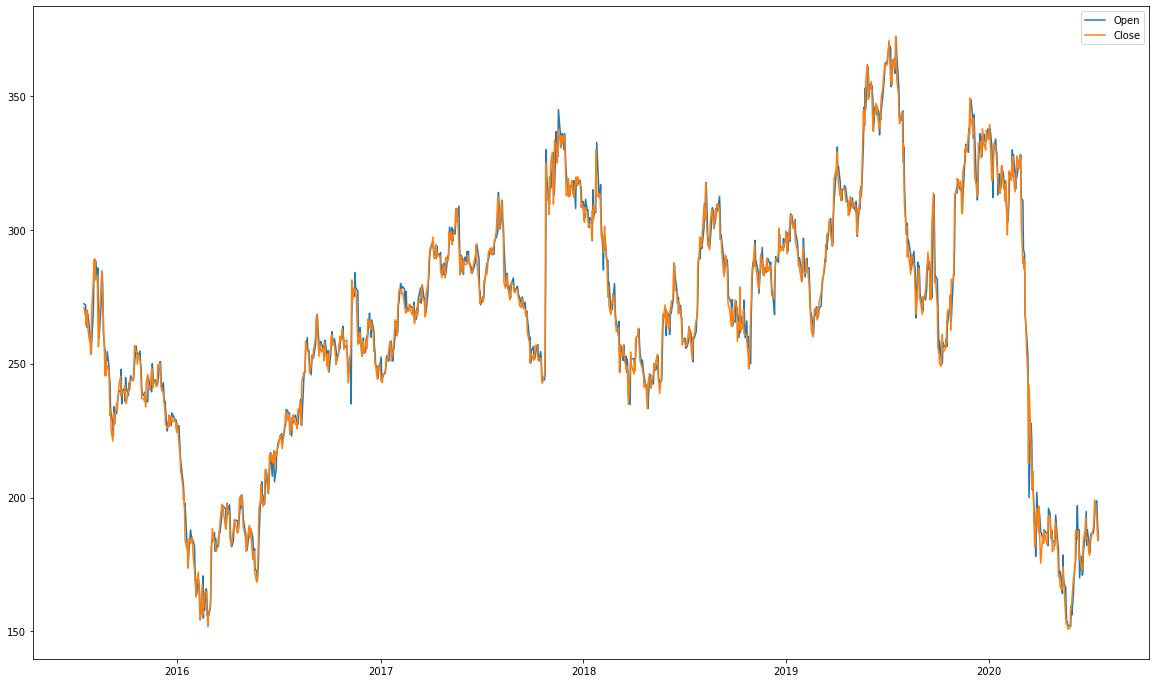

In [6]:
plt.figure(figsize=(20,12))
plt.plot(df['Open'],label='Open')
plt.plot(df['Close'],label='Close')
#plt.plot(df['Volume'],label='Volume')
plt.legend()
plt.show()

In [7]:
sm.tsa.stattools.grangercausalitytests?

In [8]:
# import for Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df, maxlag=6, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4982.7589, p=0.0000  , df_denom=1220, df_num=1
ssr based chi2 test:   chi2=5011.3485, p=0.0000  , df=1
likelihood ratio test: chi2=1995.2779, p=0.0000  , df=1


ValueError: wrong shape for coefs